In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import seaborn as sns  # 시각화 라이브러리

In [2]:
train = pd.read_csv('data2/train.csv', index_col = 'ID')
test = pd.read_csv('data2/test.csv', index_col = 'ID')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          516 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          321 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


In [5]:
train.corr()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.070421,-0.214415,-0.078248,-0.013056,0.102294,0.042807,-0.039662
event,-0.070421,1.000000,0.008723,0.013961,-0.007915,-0.049588,-0.022668,0.022554
age,-0.214415,0.008723,1.000000,-0.169429,0.074582,0.032276,0.060051,0.020334
extraversion,-0.078248,0.013961,-0.169429,1.000000,-0.208904,-0.512422,-0.150632,0.287073
independ,-0.013056,-0.007915,0.074582,-0.208904,1.000000,-0.202594,-0.418896,0.038421
selfcontrol,0.102294,-0.049588,0.032276,-0.512422,-0.202594,1.000000,-0.074452,-0.573815
anxiety,0.042807,-0.022668,0.060051,-0.150632,-0.418896,-0.074452,1.000000,0.255866
novator,-0.039662,0.022554,0.020334,0.287073,0.038421,-0.573815,0.255866,1.000000


- 시각화하기

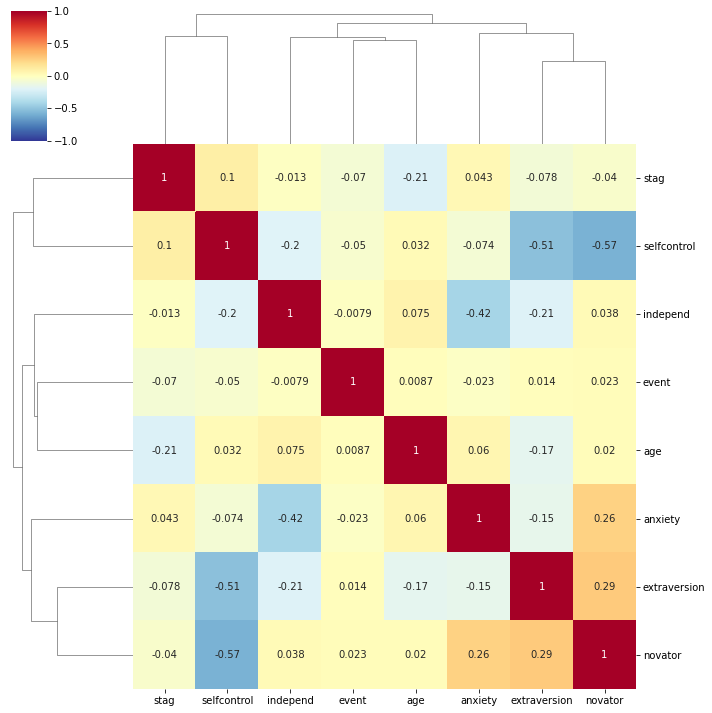

In [6]:
sns.clustermap(train.corr(),
              annot = True, # 실제값 화면에 나타내기
            cmap = 'RdYlBu_r',# Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~1 범위로 표시
              )

In [7]:
test.corr()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.213404,-0.129267,0.065200,0.050795,-0.040311,-0.066284
age,-0.213404,1.000000,-0.116970,0.043920,0.013688,0.038650,0.062018
extraversion,-0.129267,-0.116970,1.000000,-0.191124,-0.579729,-0.107014,0.317611
independ,0.065200,0.043920,-0.191124,1.000000,-0.121016,-0.436577,0.002716
selfcontrol,0.050795,0.013688,-0.579729,-0.121016,1.000000,-0.137211,-0.526195
anxiety,-0.040311,0.038650,-0.107014,-0.436577,-0.137211,1.000000,0.227025
novator,-0.066284,0.062018,0.317611,0.002716,-0.526195,0.227025,1.000000


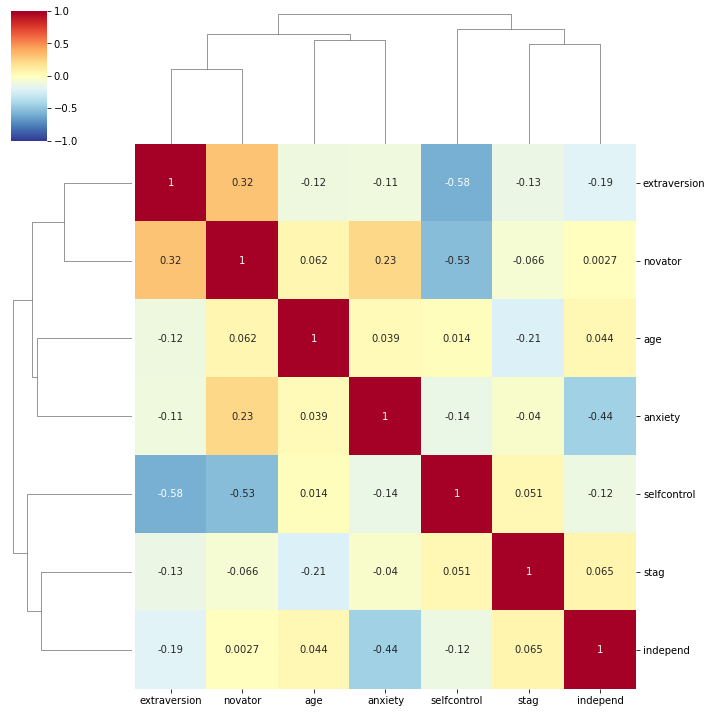

In [8]:
sns.clustermap(test.corr(),
              annot = True, # 실제값 화면에 나타내기
            cmap = 'RdYlBu_r',# Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~1 범위로 표시
              )

In [9]:
pd.set_option('display.max_row', 500)
pt1 = train.pivot_table(values = 'stag', index = ['coach', 'gender'], aggfunc = 'mean')
pt1

stag
coach   gender           
my head f       37.592777
        m       35.997760
no      f       33.495768
        m       46.687709
yes     f       38.830323
        m       31.132101

### 나이 결측치 채우기 (coach 와 성별 기준)

In [10]:
def fill_stag(df):
    # 만약 나이가 결측치라면 피봇테이블에서 값을 가져와서 채운다.
    if np.isnan(df['stag']): # 결측치이면 true, 아니면 false
        return pt1.loc[df['coach'],df['gender']]
    # 만약 나이가 결측치가 아니라면 원래 나이값을 사용하자
    else:
        return df['stag']

In [11]:
train['stag'] = train.apply(fill_stag, axis = 1).astype('float64')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [13]:
test['stag'] = test.apply(fill_stag, axis = 1).astype('float64')

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


In [15]:
np.isnan(train['age'])#numpy.isnan() -> float이 NaN인지 아닌지 확인해 줍니다

ID
1      False
2      False
3      False
4      False
5      False
       ...  
695    False
696    False
697    False
698    False
699    False
Name: age, Length: 699, dtype: bool

# Stag 채우기 (train, test)

In [16]:
# pd.set_option('display.max_row', 500)
# pt1 = train.pivot_table(values = 'stag', index = ['greywage_new', 'age'], aggfunc = 'mean')
# pt1

In [17]:
pd.set_option('display.max_row', 500)
pt1 = train.pivot_table(values = 'stag', index = ['novator', 'gender'], aggfunc = 'mean')
pt1

stag
novator gender           
1.0     f       41.872690
        m       31.967146
1.3     f       56.120766
        m       44.459212
2.1     f       41.726679
        m       43.124393
2.9     f       31.952501
        m       25.706275
3.7     f       37.141402
        m       36.589109
4.4     f       34.872710
        m       37.826616
5.2     f       37.308826
        m       51.090989
6.0     f       38.115868
        m       45.310970
6.7     f       36.869809
        m       47.363610
7.5     f       29.736135
        m       48.347609
8.3     f       35.618218
        m       30.165508
9.0     f       23.305104
        m       36.106776
9.8     f       50.975998
        m       43.944044
10.0    f       26.940452
        m       46.687709

In [18]:
def fill_stag(df):
    # 만약 stag가 결측치라면 피봇테이블에서 값을 가져와서 채운다.
    if np.isnan(df['stag']): # 결측치이면 true, 아니면 false
        return pt1.loc[df['novator'],df['gender']]
    # 만약 stag가 결측치가 아니라면 원래 나이값을 사용하자
    else:
        return df['stag']

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      672 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      679 non-null    object 
 10  way           678 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   666 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 92.8+ KB


In [20]:
train['stag'] = train.apply(fill_stag, axis = 1).astype('float64')

In [21]:
test['stag'] = test.apply(fill_stag, axis = 1).astype('float64')

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   360 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   385 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


# industry 채우기 - train

In [23]:
train['industry'].value_counts()

Retail             171
manufacture         80
Banks               79
etc                 63
IT                  44
Consult             44
State               40
Building            32
transport           26
Telecom             21
PowerGeneration     19
Pharma              16
Agriculture         11
Mining              10
 HoReCa              8
RealEstate           8
Name: industry, dtype: int64

In [24]:
test['industry'].value_counts()

Retail             110
IT                  77
manufacture         62
Banks               31
Consult             30
etc                 27
PowerGeneration     18
Telecom             15
Mining              13
State               12
transport           11
Building             9
Agriculture          4
Pharma               4
RealEstate           4
 HoReCa              3
Name: industry, dtype: int64

In [25]:
train['industry'] = train['industry'].fillna(method='pad') #train 에는 없음
# train['industry'] = train['industry'].fillna('N')

In [26]:
# train.drop('industry', inplace = True, axis=1) # 인더스트리 드랍함

In [27]:
# train['industry_new']

In [28]:
# train['industry_new'].value_counts()

# Greywage 채우기 - train (20개)

In [29]:
train['greywage'].value_counts()

white    602
grey      77
Name: greywage, dtype: int64

In [30]:
train['greywage'] = train['greywage'].fillna(method='pad')

In [31]:
# train['greywage_new'].value_counts()

# 파이차트 사용해보기

In [32]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    move = train[train['event'] == 1][feature].value_counts()
    remain = train[train['event'] == 0][feature].value_counts() 
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([move[index], remain[index]], labels=['Move', 'Remain'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

In [33]:
# pie_chart('industry_new')

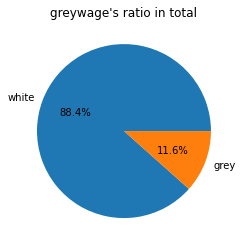

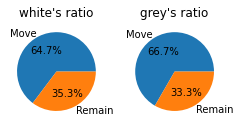

In [34]:
pie_chart('greywage')

# 시각화

### 일한 시간(stag) & 임금투명성(greywage) 와의 관계

In [35]:
# plt.figure(figsize  = (15,5))
# sns.violinplot(data = train,
#               x = 'greywage_new',
#               y = 'stag',
#               hue = 'event',
#               split = True)

In [36]:
# 0~50일 사이 이직률이 높다?

In [37]:
# plt.figure(figsize  = (15,5))
# sns.violinplot(data = train,
#               x = 'greywage_new',
#               y = 'age',
#               hue = 'event',
#               split = True)

In [38]:
# 불투명일 때 나이가 30이상인 사람들은 이직률이 낮았다?

# way 채우기 - train(21개)

### way와 event와의 관계

<AxesSubplot:xlabel='way', ylabel='count'>

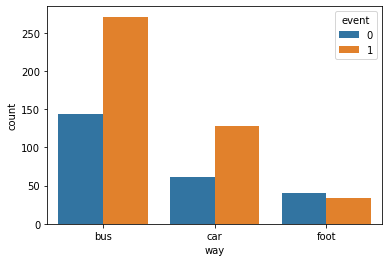

In [39]:
sns.countplot(data = train, x = 'way', hue='event')

In [40]:
# 버스일때 이직률이 높음?

In [41]:
train['way'] = train['way'].fillna(method='pad')

In [42]:
train['way'].value_counts()

bus     436
car     189
foot     74
Name: way, dtype: int64

In [43]:
# train['way_new'].value_counts()

# selfcontrol 채우기 - test(33개),train(45개)

In [44]:
train['selfcontrol'].value_counts()

5.7     103
4.1      94
4.9      93
6.4      77
7.2      76
8.0      55
3.3      51
2.6      44
8.7      28
9.5      17
1.8      15
10.0      7
1.0       6
Name: selfcontrol, dtype: int64

In [45]:
train['selfcontrol'] = train['selfcontrol'].fillna(method='pad')

In [46]:
# train['selfcontrol_new'].value_counts()

In [47]:
test['selfcontrol'].value_counts()

6.4     63
4.1     51
7.2     45
5.7     43
4.9     39
3.3     34
8.0     28
8.7     27
2.6     26
9.5     12
1.8      9
10.0     5
1.0      3
Name: selfcontrol, dtype: int64

In [48]:
test['selfcontrol'] = test['selfcontrol'].fillna(method='pad')

In [49]:
# test['selfcontrol_new'].value_counts()

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      699 non-null    object 
 10  way           699 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   699 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 112.8+ KB


# head_gender 채우기 test(70개)

In [51]:
test['head_gender'].value_counts()

m    205
f    155
Name: head_gender, dtype: int64

In [52]:
test['head_gender'] = test['head_gender'].fillna(method='pad')

In [53]:
# test['head_gender_new'].value_counts()

# 예전 데이터 지우기

### train 에서.

In [54]:
train.info() # industry, greywage, way, selfcontrol 지우기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   event         699 non-null    int64  
 2   gender        699 non-null    object 
 3   age           699 non-null    float64
 4   industry      699 non-null    object 
 5   profession    699 non-null    object 
 6   traffic       699 non-null    object 
 7   coach         699 non-null    object 
 8   head_gender   699 non-null    object 
 9   greywage      699 non-null    object 
 10  way           699 non-null    object 
 11  extraversion  699 non-null    float64
 12  independ      699 non-null    float64
 13  selfcontrol   699 non-null    float64
 14  anxiety       699 non-null    float64
 15  novator       699 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 112.8+ KB


In [55]:
# industry, greywage, way, selfcontrol 지우기
# train.drop('industry', inplace = True, axis=1) # 인더스트리 드랍함.
# train.drop('greywage', inplace =True, axis=1)
# train.drop('way', inplace =True, axis=1)
# train.drop('selfcontrol', inplace =True, axis=1)

### test 에서.

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          430 non-null    float64
 1   gender        430 non-null    object 
 2   age           430 non-null    float64
 3   industry      430 non-null    object 
 4   profession    430 non-null    object 
 5   traffic       430 non-null    object 
 6   coach         430 non-null    object 
 7   head_gender   430 non-null    object 
 8   greywage      430 non-null    object 
 9   way           430 non-null    object 
 10  extraversion  430 non-null    float64
 11  independ      430 non-null    float64
 12  selfcontrol   430 non-null    float64
 13  anxiety       430 non-null    float64
 14  novator       430 non-null    float64
dtypes: float64(7), object(8)
memory usage: 53.8+ KB


In [57]:
# selfcontrol, head_gender 지우기
# test.drop('selfcontrol', inplace = True, axis=1)
# test.drop('head_gender', inplace = True, axis=1)

In [58]:
y_train = train['event']
X_train = train.drop('event', axis=1)
X_test = test

In [59]:
X_train.shape

(699, 15)

In [60]:
y_train.shape

(699,)

In [61]:
X_test.shape

(430, 15)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          699 non-null    float64
 1   gender        699 non-null    object 
 2   age           699 non-null    float64
 3   industry      699 non-null    object 
 4   profession    699 non-null    object 
 5   traffic       699 non-null    object 
 6   coach         699 non-null    object 
 7   head_gender   699 non-null    object 
 8   greywage      699 non-null    object 
 9   way           699 non-null    object 
 10  extraversion  699 non-null    float64
 11  independ      699 non-null    float64
 12  selfcontrol   699 non-null    float64
 13  anxiety       699 non-null    float64
 14  novator       699 non-null    float64
dtypes: float64(7), object(8)
memory usage: 107.4+ KB


In [63]:
cat_feature = ['gender','industry','profession','traffic','coach','head_gender','greywage','way']

In [64]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i],prefix=i)
    X_train = pd.concat([X_train,dummy],axis = 1)
    X_train.drop(i,axis=1,inplace=True)

In [65]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix = i)
    X_test = pd.concat([X_test,dummy], axis = 1)
    X_test.drop(i, axis = 1, inplace = True)

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 700 to 1129
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            430 non-null    float64
 1   age                             430 non-null    float64
 2   extraversion                    430 non-null    float64
 3   independ                        430 non-null    float64
 4   selfcontrol                     430 non-null    float64
 5   anxiety                         430 non-null    float64
 6   novator                         430 non-null    float64
 7   gender_f                        430 non-null    uint8  
 8   gender_m                        430 non-null    uint8  
 9   industry_ HoReCa                430 non-null    uint8  
 10  industry_Agriculture            430 non-null    uint8  
 11  industry_Banks                  430 non-null    uint8  
 12  industry_Building               4

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            699 non-null    float64
 1   age                             699 non-null    float64
 2   extraversion                    699 non-null    float64
 3   independ                        699 non-null    float64
 4   selfcontrol                     699 non-null    float64
 5   anxiety                         699 non-null    float64
 6   novator                         699 non-null    float64
 7   gender_f                        699 non-null    uint8  
 8   gender_m                        699 non-null    uint8  
 9   industry_ HoReCa                699 non-null    uint8  
 10  industry_Agriculture            699 non-null    uint8  
 11  industry_Banks                  699 non-null    uint8  
 12  industry_Building               699 

In [69]:
set(X_train.columns) -  set(X_test.columns)

set()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# KNN 모델

In [90]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [91]:
result = cross_val_score(knn_model, X_train, y_train, cv=5)
result

array([0.50714286, 0.65714286, 0.54285714, 0.6       , 0.5971223 ])

### Scaler

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
scaler.fit(X_train)

StandardScaler()

In [99]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[-1.01230564,  0.67278718,  0.31377326, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       [-0.47376281,  0.37568779,  0.31377326, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       [-0.71138789,  0.67278718,  0.31377326, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       ...,
       [ 1.12743052,  0.07858839, -2.33404378, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       [ 0.09809195, -1.2583589 ,  1.63768178, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       [ 3.63692907, -0.06996131,  1.63768178, ...,  0.7766666 ,
        -0.60875959, -0.34409301]])

In [100]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[-0.73692704,  2.15828417, -1.01013526, ..., -1.28755376,
        -0.60875959,  2.90619097],
       [ 0.69881705,  0.37568779,  1.19637894, ..., -1.28755376,
         1.6426846 , -0.34409301],
       [ 0.69881705,  0.37568779, -1.01013526, ..., -1.28755376,
         1.6426846 , -0.34409301],
       ...,
       [ 2.76526697,  0.52423748, -0.56883242, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       [ 0.42010725,  3.04958236, -1.01013526, ...,  0.7766666 ,
        -0.60875959, -0.34409301],
       [-0.41047015, -0.21851101,  2.07898462, ..., -1.28755376,
         1.6426846 , -0.34409301]])

In [101]:
result = cross_val_score(tree_model, transform_X_train, y_train, cv = 5)

In [102]:
result

array([0.45714286, 0.72142857, 0.47857143, 0.60714286, 0.64028777])

# 결정트리

In [133]:
tree_model = DecisionTreeClassifier(max_depth = 5)

In [134]:
result = cross_val_score(tree_model, X_train, y_train, cv = 5)

In [135]:
result.mean()

0.5709146968139774

# 평가

In [143]:
result = pd.read_csv('data2/submission.csv')

In [137]:
# result

In [138]:
tree_model.fit(X_train, y_train)
pre = tree_model.predict(X_test)

In [139]:
pre

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [142]:
result

array([0.45714286, 0.71428571, 0.45714286, 0.58571429, 0.64028777])

In [144]:
result['event'] = pre

In [145]:
result.to_csv('data2/submission.csv', index=False)

# novator과 이직률의 관계 그래프 (쓸모없는듯)

<AxesSubplot:xlabel='novator', ylabel='count'>

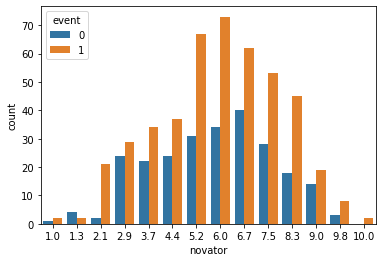

In [68]:
sns.countplot(data=train,x='novator', hue = 'event')